In [ ]:
# Implement the method get_data() in Home-Credit-Prediction/homecredit/data.py

In [28]:

import os
import sys
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
path_dir = (os.path.dirname(os.getcwd()))
sys.path.append(path_dir)

from homecredit.data import HomeCredit

In [8]:
data = HomeCredit().get_data()['train']
data.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:

class Exploration:
    
    def __init__(self):
        # Assign an attribute ".data" to all new instances of Order
        self.data = HomeCredit().get_data()['train'].copy() # good practice to be sure not to modify your `data` variable
        
    def get_catcols(self):
        
        cat_cols = [col for col in self.data.columns if self.data[col].dtypes == "O"]   
        return cat_cols
    
    def get_numcols(self):   
        num_cols = [col for col in self.data.columns if (self.data[col].dtypes != "O")]
        
        return num_cols

    def plot_catcols_whole(self):
        
        fig, axs = plt.subplots(len(self.get_catcols())//2, 2, figsize=(19,40)) # axs is a (1,2) nd-array
        for i, col in enumerate(self.get_catcols()[:8]):   
            sns.countplot(x = col, data = self.data, ax=axs[i, 0]); 

        for i, col in enumerate(self.get_catcols()[8:]):   
            sns.countplot(x = col, data = self.data, ax=axs[i, 1]); 

    def plot_catcols_single(self, col): # col : col name
        
        fig, ax=plt.subplots(1,2,figsize=(14,4))

        # First plot
        sns.countplot(x = col, data = self.data , ax=ax[0]); 
        #ax[0].set_title(str(col) +" Entries %");

        
        # Second plot
        t = pd.crosstab(self.data[col], "freq", normalize=True)
        t = t.assign(type = t.index, freq = 100 * t.freq) 
        sns.barplot(y = "type", x = "freq", data = t, ax=ax[1])
        ax[1].set_title("Comparing percentages for "+str(col))


In [59]:
ex = Exploration()

In [32]:
ex.__dict__.keys()

dict_keys(['data'])

In [33]:
ex.get_catcols()

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [34]:
ex.get_numcols()

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

In [35]:
print( "catcols : ", len(ex.get_catcols()), " // numcols  :", len(ex.get_numcols()) )

catcols :  16  // numcols  : 106


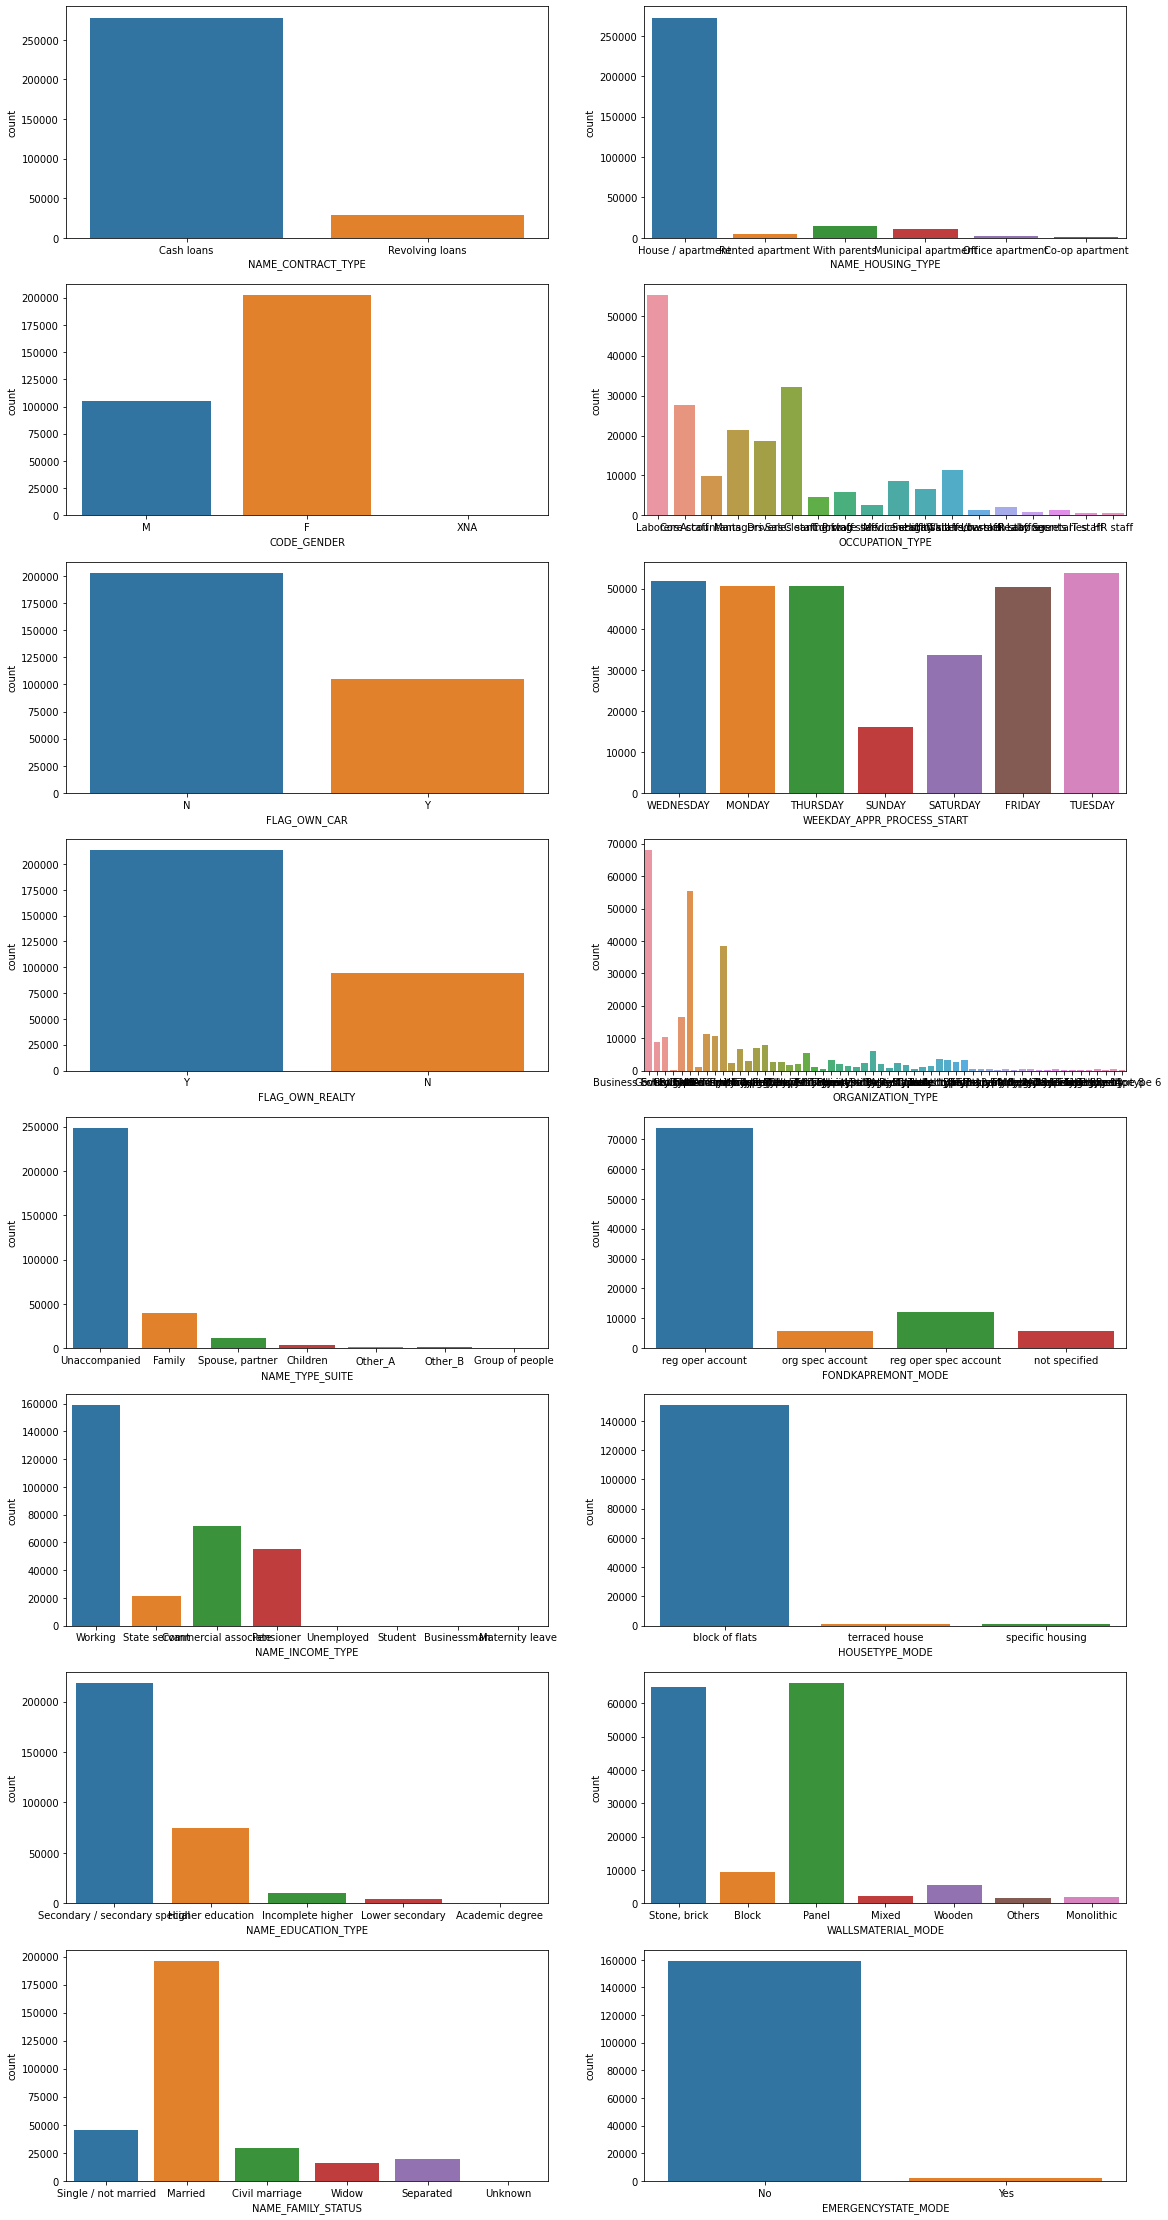

In [47]:
ex.plot_catcols_whole()

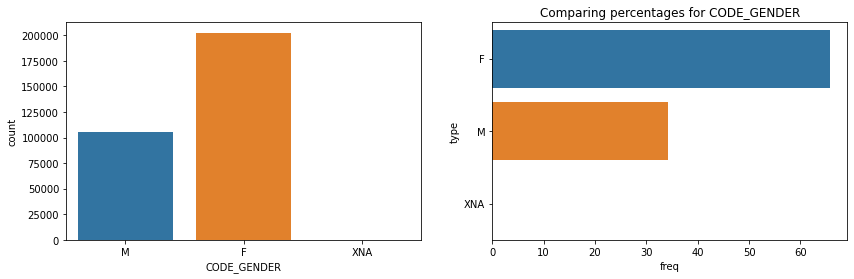

In [60]:
ex.plot_catcols_single(col = "CODE_GENDER")